# LDA Basics 

## Theory

It is a simple but powerful tool for __linear__ dimension reduction technique. It is similar to PCA. PCA finds component axes that would maximise __variance__ of the data, LDA separates the axes and creates a maximum separation. 

LDA is a supervised dimensionality reduction technique. The goal is to __project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”)__ and also reduce computational costs. Basically, the added advantage LDA gives over PCA is to __tackle overfitting__.

Steps for LDA :-
1. Compute d-dimensional mean vectors for different classes from the dataset, where d is the dimension of feature space.
2. Compute in-between class and with-in class scatter matrices.
3. Compute eigen vectors and corresponding eigen values for the scatter matrices.
4. Choose k eigen vectors corresponding to top k eigen values to form a transformation matrix of dimension d x k.
5. Transform the d-dimensional feature space X to k-dimensional feature space X_lda via the transformation matrix.

The dataset used here is bank note authentication dataset publicly available in UCI machine learning repository.


Let us start by importing the libraries and seeing the data. Data seeing would help us visualise and understand the data better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Now we read the data through the read.csv funtion of python.

In [2]:
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False,names = columns)

In [3]:
df.head(5)

,var,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


##### Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images. 

## Attribute Defination

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) 

In [4]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Text(0,0.5,'Count')

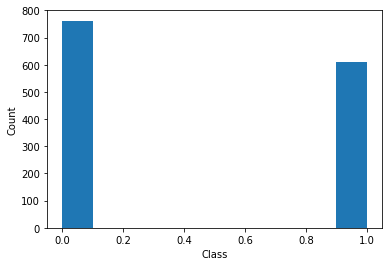

In [5]:
plt.hist(df['class'])
plt.xlabel('Class')
plt.ylabel('Count')

Next task would be to view the variables in terms of their distribution and if Gaussian Kernal Density estiamate is used.
The first one is devoid of Gaussian Kernal Density estimate. The second one has Kernal Density estimate in it.

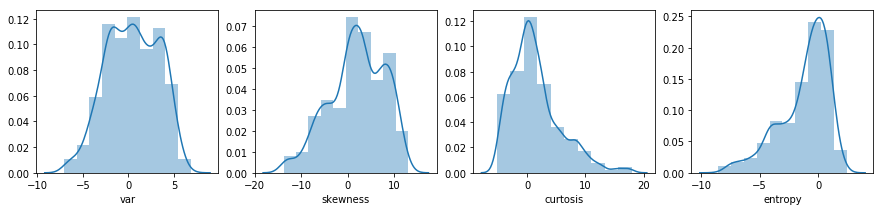

In [6]:
f, ax = plt.subplots(1, 4, figsize=(15,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')

Now the one with Gaussian Kernal Density estimate.

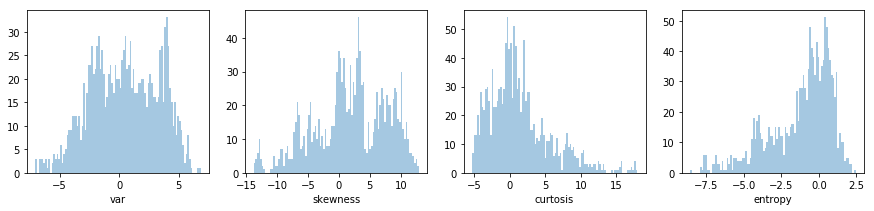

In [7]:
f, ax = plt.subplots(1, 4, figsize=(15,3))
vis1 = sns.distplot(df["var"],bins=100, ax= ax[0],kde=False)
vis2 = sns.distplot(df["skewness"],bins=100, ax=ax[1],kde=False)
vis3 = sns.distplot(df["curtosis"],bins=100, ax= ax[2],kde=False)
vis4 = sns.distplot(df["entropy"],bins=100, ax=ax[3],kde=False)
f.savefig('subplot.png')

From the above two figures it becomes evident that 
1. Setting kde to False doesn't fit the Gaussian normal estimated curve to the histograms.
2. The histograms are not normalised. The value on the x-axis is the actual parameter value and the value on the y- axis represents the count at that particular value.
3. The bins variable represents the specification of number of histogramic bins. Increasing the number of bins increases the accuracy or the representative nature of the graph. The higher the bin number the more accurate and higher the computation powere required to capture and calculate them.

#### Pairplot - to figure of the correlation and work amongst the parameters

In [ ]:
sns.pairplot(df,hue="class")

Here we find that no single variable is giving us the clear demarkation of the class. Now, we will compute the 4-dimensional mean vectors for both the classes (4 = number of features). Unlike PCA, standardization of the data is not needed in LDA as it doesn’t affect the output. The reason why there’s no effect of standardization on the main results in LDA is that LDA decomposes ratio of Between-to-Within covariances, and not the covariance itself having its magnitude (as PCA does).

In [10]:
mean_vec = []
for i in df["class"].unique():
    mean_vec.append( np.array((df[df["class"]==i].mean()[:4]) ))
print(mean_vec)

[array([ 2.27668601,  4.25662719,  0.79671797, -1.14764028]), array([-1.86844256, -0.99357612,  2.14827101, -1.24664075])]


The next step is to calculate the with-in class scatter matrices and in-between class scatter matrices.

In [20]:
SW = np.zeros((4,4))
for i in range(1,4): #2 is number of classes
    per_class_sc_mat = np.zeros((4,4))
    for j in range(df[df["class"]==i].shape[0]):
        #print(df.loc[j][:4])
        row= df.loc[j][:4].tolist()
        mv=mean_vec[i].reshape(4,1)
        per_class_sc_mat += (row-mv).dot((row-mv).T)
    SW += per_class_sc_mat
    
print('within-class Scatter Matrix:\n', SW)
overall_mean = np.array(df.drop("class", axis=1).mean())
SB = np.zeros((4,4))

for i in range(2): #2 is number of classes
    n = df[df["class"]==i].shape[0]
    mv = mean_vec[i].reshape(4,1)
    overall_mean = overall_mean.reshape(4,1) # make column vector
    SB += n * (mv - overall_mean).dot((mv - overall_mean).T)
    
print('between-class Scatter Matrix:\n', SB)

within-class Scatter Matrix:
 [[67148.31582715 59851.57586442 33647.2999493  61962.23716637]
 [59851.57586442 54422.39063631 34924.93445202 55992.8414432 ]
 [33647.2999493  34924.93445202 39513.21458794 34555.3647926 ]
 [61962.23716637 55992.8414432  34555.3647926  57719.55400432]]
between-class Scatter Matrix:
 [[ 5.82112206e+03  7.37300999e+03 -1.89802442e+03  1.39029178e+02]
 [ 7.37300999e+03  9.33862504e+03 -2.40403016e+03  1.76093803e+02]
 [-1.89802442e+03 -2.40403016e+03  6.18866372e+02 -4.53315997e+01]
 [ 1.39029178e+02  1.76093803e+02 -4.53315997e+01  3.32051315e+00]]


Next, we need to solve the generalized eigenvalue problem for the matrix inverse(SW).SB to obtain the linear discriminants.

In [23]:
e_vals, e_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))

print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.78339214  0.69459883  0.03238718  0.10803661]
 [ 0.57581776 -0.66648951 -0.01321028  0.01006967]
 [-0.15283585  0.17690231  0.12068209  0.43590109]
 [ 0.17712108 -0.20501164  0.99207479  0.89342987]]

Eigenvalues 
[-4.68750000e-02  2.94618953e+13  9.64275326e-05  9.16229296e-04]


In [ ]:
https://medium.com/journey-2-artificial-intelligence/lda-linear-discriminant-analysis-using-python-2155cf5b6398